In [1]:
import warnings
warnings.filterwarnings("ignore")

import skmob
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt

# Exercise 1: Implement the speed-based noise filtering approach

In this exercise, you will implement a noise filtering approach based on speed thresholds and test it on a trajectory in Pisa.

Steps:

1. Get a trajectory in the city of Pisa

2. Given a trajectory T=(p_0, ..., p_{n-1}) and a speed threshold:
    - each p_i is (lat, lng, time)
    - take the first point p_0 compare with p_1
    - in general: take the last valid point and compare with the next one
    - p_i is a valid point if speed(p_{i-1}, p_i) <= threshold

3. Speed (A, B) is dist(A, B)/time(A, B)
    - dist(A, B) -> haversine(A, B)
    - time(A, B) -> time_B - time_A


**Pseudocode of the speed filtering**
```
speed_filtering(T, speed_threshold):

    #  T[i] means i-th element of T
    # P (lat, lng, time)

    list_non_valid_points = []
    
    T' = [T[0]]
    ind_last_valid_point = 0

    for i in [1, len(T)):

        last_valid_P = T[ind_last_valid_point]
        curr_P = T[i]

        dist = haversine(last_valid_P[:2], curr_P[:2])
        time_diff = curr_P[2] - last_valid_P[2]

        speed = dist/time_diff

        # is it valid?
        if speed <= speed_threshold:
            T'.append(curr_P)
            ind_last_valid_point = i
        else:
            list_non_valid_points.append(curr_P)


    output T', list_non_valid_points
```

In [32]:

from math import radians, sin, cos, sqrt, atan2

haversine (for the distance) 
def haversine(coord1, coord2):
    # Haversine formula to calculate distance between two points in meters
    R = 6371000  # Earth radius in meters
    lat1, lon1 = radians(coord1[0]), radians(coord1[1])
    lat2, lon2 = radians(coord2[0]), radians(coord2[1])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

def speed_filtering(T, speed_threshold):
    # Initialize variables
    list_non_valid_points = []
    filtered_trajectory = [T[0]]
    ind_last_valid_point = 0

    # Loop through trajectory points
    for i in range(1, len(T)):
        last_valid_P = T[ind_last_valid_point]
        curr_P = T[i]

        # Calculate distance and time difference
        dist = haversine(last_valid_P[:2], curr_P[:2])
        time_diff = curr_P[2] - last_valid_P[2]
        
        if time_diff == 0:
            continue  # Avoid division by zero

        speed = dist / time_diff
        speed = speed * 3.6

        # Validate speed
        if speed <= speed_threshold:
            filtered_trajectory.append(curr_P)
            ind_last_valid_point = i
        else:
            list_non_valid_points.append(curr_P)

    return filtered_trajectory, list_non_valid_points

### Testing the algorithm

In [4]:
# Example trajectory in Pisa (lat, lng, timestamp in seconds)
trajectory_pisa = [
    (43.716667, 10.4, 0),          # Point 1 - plausible
    (43.716667, 10.401, 10),       # Point 2 - plausible
    (43.7168, 10.4015, 20),        # Point 3 - plausible
    (43.717, 10.402, 30),          # Point 4 - plausible
    (43.7175, 10.403, 35),         # Point 5 - unplausible
    (43.718, 10.404, 45),          # Point 6 - plausible
    (43.7182, 10.405, 50),         # Point 7 - plausible
    (43.719, 10.406, 52),          # Point 8 - unplausible
    (43.7192, 10.407, 62),         # Point 9 - plausible
    (43.7195, 10.408, 65),         # Point 10 - plausible
    (43.72, 10.409, 67),           # Point 11 - unplausible
    (43.7205, 10.41, 70),          # Point 12 - plausible
    (43.721, 10.411, 75),          # Point 13 - plausible
    (43.7215, 10.412, 80),         # Point 14 - plausible
    (43.722, 10.413, 85),          # Point 15 - plausible
    (43.7225, 10.414, 88),         # Point 16 - plausible
    (43.723, 10.415, 90),          # Point 17 - unplausible
    (43.7235, 10.416, 100),        # Point 18 - plausible
    (43.724, 10.417, 110),         # Point 19 - plausible
    (43.7245, 10.418, 115)         # Point 20 - plausible
]

# Filter the trajectory with a speed threshold of 10 km/h
filtered_traj, non_valid_points = speed_filtering(trajectory_pisa, speed_threshold=10)

print("Filtered Trajectory:", filtered_traj)
print("Non-valid Points:", non_valid_points)

Filtered Trajectory: [(43.716667, 10.4, 0), (43.716667, 10.401, 10), (43.717, 10.402, 20)]
Non-valid Points: [(43.718, 10.403, 25), (43.718, 10.404, 35)]


In [1]:
# Filter the trajectory and show valid vs non-valid points

filtered_traj, non_valid_points = speed_filtering(trajectory_pisa, speed_threshold=40)


# df for the original trajectory
df_original = pd.DataFrame()
df_original["uid"] = [42]*len(trajectory_pisa)
df_original["lat"] = [p[0] for p in trajectory_pisa]
df_original["lng"] = [p[1] for p in trajectory_pisa]
df_original["datetime"] = [p[2] for p in trajectory_pisa]

# df for the filtered trajectory
df_filtered = pd.DataFrame()
df_filtered["uid"] = [42]*len(filtered_traj)
df_filtered["lat"] = [p[0] for p in filtered_traj]
df_filtered["lng"] = [p[1] for p in filtered_traj]
df_filtered["datetime"] = [p[2] for p in filtered_traj]

# df for the non-valid points of the trajectory
df_non_valid = pd.DataFrame()
df_non_valid["uid"] = [42]*len(non_valid_points)
df_non_valid["lat"] = [p[0] for p in non_valid_points]
df_non_valid["lng"] = [p[1] for p in non_valid_points]
df_non_valid["datetime"] = [p[2] for p in non_valid_points]

NameError: name 'speed_filtering' is not defined

In [31]:
map_f = skmob.TrajDataFrame(df).plot_trajectory(hex_color="black") #o riginal
map_f = skmob.TrajDataFrame(df_filtered).plot_trajectory(hex_color="red", map_f=map_f) # filtered
skmob.TrajDataFrame(df_non_valid).plot_trajectory(hex_color="blue", map_f=map_f) # invalid points

### What is the impact of the speed threshold?

In [35]:
filtered_traj_20, non_valid_points_20 = speed_filtering(trajectory_pisa, speed_threshold=20)
filtered_traj_40, non_valid_points_40 = speed_filtering(trajectory_pisa, speed_threshold=40)
filtered_traj_100, non_valid_points_100 = speed_filtering(trajectory_pisa, speed_threshold=100)

len(filtered_traj_20), len(filtered_traj_40), len(filtered_traj_100), len(trajectory_pisa)

#### Let's see how different speed thresholds affect the number of invalid points

In [46]:
list_speeds = np.arange(1, 150, 5)

n_invalid_points = []

for speed in list_speeds:
    filtered_traj, non_valid_points = speed_filtering(trajectory_pisa, speed_threshold=speed)
    n_invalid_points.append(len(non_valid_points))


Text(0, 0.5, '# invalid')

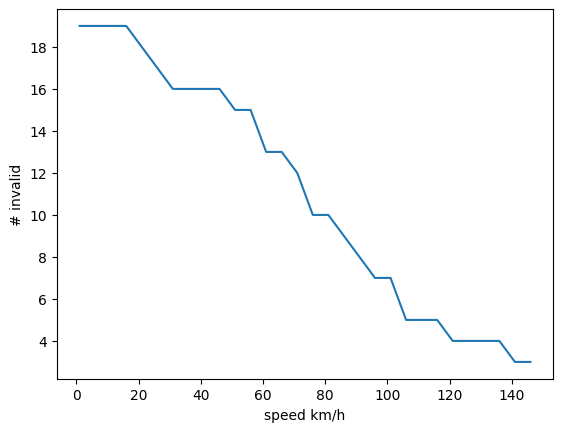

In [50]:
plt.plot(list_speeds, n_invalid_points);
plt.xlabel("speed km/h")
plt.ylabel("# invalid")

In [57]:
traj_to_plot = filtered_traj_100

df = pd.DataFrame()
df["uid"] = [42]*len(traj_to_plot)
df["lat"] = [p[0] for p in traj_to_plot]
df["lng"] = [p[1] for p in traj_to_plot]
df["datetime"] = [p[2] for p in traj_to_plot]

tdf = skmob.TrajDataFrame(df)

In [53]:
from skmob.preprocessing.filtering import filter

,uid,lat,lng,datetime
0,42,43.716667,10.400,1970-01-01 00:00:00.000000000
1,42,43.724500,10.418,1970-01-01 00:00:00.000000115


In [59]:
map_f = tdf.plot_trajectory(hex_color="red")
filter(tdf, 100).plot_trajectory(hex_color="blue", map_f=map_f)
